## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных

**children** — количество детей в семье \
**days_employed** — общий трудовой стаж в днях \
**dob_years** — возраст клиента в годах \
**education** — уровень образования клиента \
**education_id** — идентификатор уровня образования \
**family_status** — семейное положение \
**family_status_id** — идентификатор семейного положения \
**gender** — пол клиента \
**income_type** — тип занятости \
**debt** — имел ли задолженность по возврату кредитов \
**total_income** — ежемесячный доход \
**purpose** — цель получения кредита 

## Оглавление

[Открытие данных](#id-open) \
[Предобработка данных](#id-transformation) 
* [Обработка пропусков](#id-missing)
* [Замена типа данных](#id-type)
* [Обработка дубликатов](#id-dupllicates)
* [Лемматизация](#id-lemmas)
* [Категоризация](#id-category) 

[Ответы на вопросы](#id-questions) \
[Главный вывод](#id-conclusion)

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="id-open"></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/datasets/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Определим процент пустых значений.

In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [5]:
df.isnull().sum()["days_employed"]/len(df)

0.10099883855981417

In [6]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

Первый взгляд на исходную таблицу показал следующее:
- В наборе данных 12 переменных и 21525 наблюдения;
- Переменные children, dob_years, total_income - количественные, education (education_id), family_status (family_status_id), gender, income_type - категориальные, debt - логическая; purpose - переменная, которая содержит строковые значения.
- Типы колонок: 5 - int64, 2 - float64, 5 - object - надо привести поменять типы данных для экономии памяти и удобства работы со столбцами;
- В колонках days_employed и total_income 10% незаполненных значений - надо поработать с пропусками;
- В колонках children, days_employed есть артефакты - отрицательные значения. Также в колонке days_employed очень большое для реальной жизни значение max  - надо дополнительно изучить природу ошибочных значений;
- В колонке days_employed среднее очень сильно отличается от медианы - надо дополнительно изучить этот момент, возможно это связано с ошибочными отрицательными значениями;
- В колонке education одинаковые значения видов образования написаны разным размером букв (строчные/прописные) - надо исправить.

### Шаг 2. Предобработка данных  <a id="id-transformation"></a>

### Обработка пропусков<a id="id-missing"></a>

In [7]:
df["education"] = df["education"].str.lower()

In [8]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Строк с пропусками слишком много (10%), чтобы исключать их из выборки - можно потерять ценную информацию.

Количество пропущенных значений в days_employed и total_income одинаково. Пропущены ли они в одинаковых наблюдениях?

In [9]:
df_na = df[(df["days_employed"].isnull()) & (df["total_income"].isnull())]

In [10]:
len(df_na)

2174

Предположение подтвердилось. Интуитивно кажется, что количество дней занятости и доход клиента - связанные величины и то, что эти величины не заполнены - неслучайное событие.
Проверим, есть ли задолженность у клиентов с пропущенными значениями.

In [11]:
df_na.groupby('debt')

В большинстве случаев такие клиенты не имеют задолженности. Возможно, отсутствие информации об их уровне дохода и стаже происходит потому, что это vip-клиенты банка, с которыми банк сотрудничает долгое время и сомнений в их платежеспособности у банка нет. Поэтому информация о доходе и стаже просто не собирается. 

Заполним пустые значения одним из ad-hoc методов (среднее/медиана), но перед этим посмотрим на значения в колонках - нет ли там чего-то необычного.

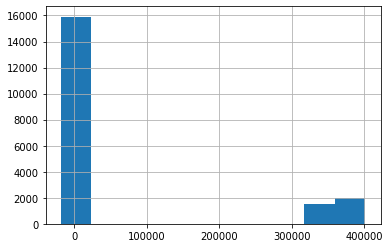

In [12]:
df["days_employed"].hist()

In [13]:
df["employed_group"] =  pd.qcut(df["days_employed"],3)

In [14]:
df.groupby('employed_group')['employed_group'].count()

employed_group
(-18388.951, -2107.092]    6451
(-2107.092, -572.011]      6450
(-572.011, 401755.4]       6450
Name: employed_group, dtype: int64

Большинство значений в колонке days_employed - отрицательные. Количество дней не может быть отрицательными. Так как уточнить природу ошибки у источника нет возможности, предположим, что отрицательные значения должны быть положительными, а минус - особенность системы выгрузки.

In [15]:
df["days_employed"] = df["days_employed"].abs()

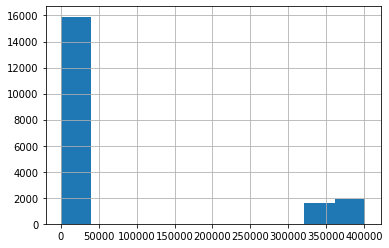

In [16]:
df["days_employed"].hist()

In [17]:
df['employed_group2'] = pd.cut(df['days_employed'],
                             [0,50000,400000])

In [18]:
df.groupby('employed_group2')['employed_group2'].count()

employed_group2
(0, 50000]         15906
(50000, 400000]     3362
Name: employed_group2, dtype: int64

3362 значения стажа являются аномальными. С точки зрения физического мира стаж не может составлять более 300000 дней (833 года). Так как количество таких данных составляет 20% от всей выборки, исключить их нельзя. Предположим, что в данном случае произошла ошибка системы и часть значений была записана в часах. Заменим соответствующие значения в колонке. 

In [19]:
def employed(employed):
    if employed > 300000:
        return employed/24
    return employed

In [20]:
df["days_employed"] = df["days_employed"].apply(employed)

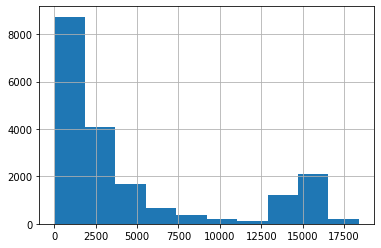

In [21]:
df["days_employed"].hist()

Так как распределение является скошенным, используем медиану для замены пустых значений.

In [22]:
df["days_employed"] = df["days_employed"].fillna(df.groupby('income_type')["days_employed"].transform('median'))

In [23]:
df[df["days_employed"].isnull()]["days_employed"].count()

0

Изучим распределение значений в колонке total_income.

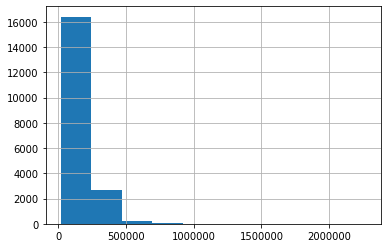

In [24]:
df["total_income"].hist()

Аномальных значений не видно, значит заменяем пустые значения на медиану.

In [25]:
df["total_income"] = df["total_income"].fillna(df.groupby('income_type')["total_income"].transform('median'))

In [26]:
df[df["total_income"].isnull()]["total_income"].count()

0

Заодно, поработаем с аномальными значениями в колонке children, чтобы дальше не возвращаться к вопросу замены значений.<font>

In [27]:
df["children"].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Предположим, что значение -1 - ошибка системы выгрузки и на самом деле здесь подразумевалось количество детей = 1. Также аномальным выглядит значение 20, учитывая что промежуточных значений между следующим максимумом(5) и 20 нет. На правой части клавиатуры кнопка 2 и 0 расположены в соседних рядах. Предположим, что произошла ошибка ввода и заменим 20 на 2.

In [28]:
df["children"] = df["children"].abs()

In [29]:
def children(children):
    if children == 20:
        return "2"
    return children

In [30]:
df["children"] = df["children"].apply(children)

Одно из значений в колонке gender - XNA. Так как строка только одна, ее можно удалить, но чтобы не терять информацию поступим иначе: для ясности интерпретации заменит XNA на not defined.

In [31]:
df["gender"].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [32]:
df["gender"].replace("XNA", "not defind", inplace=True)

### Вывод

Пуcтые значения были обнаружены в двух колонках days_employed и total_income. В колонке days_employed и children также были обнаружены аномальные значения, которые были обработаны. 

Для замены пустых значений использовалась медиана, так как она менее подвержена выбросам. 

Предположительная причина появления пустых значений - для некоторых клиентов, с которыми банк работает долгое время, информация о стаже и уровне дохода не собирается.

### Замена типа данных <a id="id-type"></a>

Уберем неиспользуемые колонки из данных.

In [33]:
df = df.drop(["employed_group", "employed_group2"], axis = 1)

Заменим числовые типы данных на int32, категориальные переменные переведем в тип categorical для экономии памяти. Переменную purpose обработаем отдельно.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null object
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.0+ MB


In [35]:
df = df.astype({"children":"int", "days_employed":"int", "" "debt":"category", "dob_years":"int", "total_income":"int", "education":"category", "income_type":"category", "gender":"category", "family_status": "category", "purpose":"str"})

### Вывод

Для экономии памяти заменили типы данных object и int64 на int32 для числовых и category для категориальных переменных. С переменной purpose в дальнейшем будем проведена отдельная работа.

Для замены типов данных использован метод astype, так как он позволяет переводить переменные в различные типы.

### Обработка дубликатов<a id="id-dupllicates"></a>

In [36]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [37]:
df_len = len(df)

Для первой оценки количества дубликатов попробуем убрать дубликаты из все таблицы

In [38]:
df_len - len(df.drop_duplicates())

71

In [39]:
df = df.drop_duplicates()

Получился 71 дубликат. Прежде, чем удалить дубликаты, проверим еще один момент. Со столбцом purpose еще не проводилась никакая работа. Могло ли произойти такое: строки полностью дублируются, но значение в столбце purpose отличается? Если да, тогда здесь могут быть 2 варианта:
1. Строки являются дубликатами, но цель кредита в столбце purpose записана немного другими словами. В таком случае такие строки также надо найти и удалить как дубликаты.
2. Один и тот же клиент берет кредит на разные цели.\
Проверим есть ли подобные строки, если да, посмотрим на столбец purpose и дальше решим, что с ними делать.

In [40]:
df_len - len(df[['children', 'days_employed', 'dob_years', 'education', 'family_status',
       'gender', 'income_type', 'debt', 'total_income']].drop_duplicates())

747

Строк, которые отличаются только значением в колонке purpose 747 - гораздо больше, чем просто дубликатов.  Вернемся к этому вопросу после лемматизации.

### Вывод

Полных дубликатов строк в таблице оказалось 71. Дубликаты дропнули из таблицы методом drop_duplicates - он ищет полные дубликаты строк в таблице и удаляет их. 

Возможная причина возникновения дубликатов - ошибка системы выгрузки либо ручная ошибка операторов.

Также возник спорный момент касательно дубликатов без учета столбца purpose. К этому вопросу вернемся после лемматизации.

### Лемматизация<a id="id-lemmas"></a>

In [41]:
from pymystem3 import Mystem

In [42]:
m = Mystem() 

Так как лемматизация для больших объемов данных в библиотеке pymystem3 может занять большое количество времени, используем библиотеку tqdm для отслеживания строки прогресса, чтобы не было скучно:)

In [43]:
common = " ".join(df['purpose'])

In [44]:
import time
from tqdm import tqdm
for i in tqdm([1,2,3,4,5,6,7,8, 9, 10]):
    common_lemmas = m.lemmatize(common)
    time.sleep(1)

100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


In [45]:
import collections
c = collections.Counter(common_lemmas)

In [46]:
most_common_dict = c.most_common(10)

In [47]:
most_common_dict

[(' ', 55023),
 ('недвижимость', 6351),
 ('покупка', 5897),
 ('жилье', 4460),
 ('автомобиль', 4306),
 ('образование', 4013),
 ('с', 2918),
 ('операция', 2604),
 ('свадьба', 2324),
 ('свой', 2230)]

In [48]:
import time
from tqdm import tqdm
for i in tqdm([1,2,3,4,5,6,7,8, 9, 10]):
    df["lemmas"] = df["purpose"].apply(m.lemmatize)
    time.sleep(1)

100%|██████████| 10/10 [00:49<00:00,  4.98s/it]


In [49]:
def lemmas(row):
    if "недвижимость" in row:
        return "недвижимость"
    if "жилье" in row:
        return "жилье"
    if "автомобиль" in row:
        return "автомобиль"
    if "свадьба" in row:
        return "свадьба"
    if "образование" in row:
        return "образование"

In [50]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,"[операция, , с, , жилье, \n]"
21521,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,"[сделка, , с, , автомобиль, \n]"
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,"[недвижимость, \n]"
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,"[на, , покупка, , свой, , автомобиль, \n]"


In [51]:
df = df.drop("purpose", axis = 1)

In [52]:
df["lemmas"] = df["lemmas"].apply(lemmas)

In [53]:
df["lemmas"].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: lemmas, dtype: int64

In [54]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,lemmas
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,жилье
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,жилье
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,жилье


In [55]:
df.columns = ['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose']

Вернемся к вопросу дубликатов: теперь, когда в колонке purpose выделены только ключевые слова посмотрим, остались ли дубликаты:

In [56]:
len(df) - len(df.drop_duplicates())

244

Да, осталось 244 дубликата, дропнем их.

In [57]:
df = df.drop_duplicates()

### Вывод

Проведена лемматизация столбца purpose - с помощью библиотки pymystem3 выделены списки лемм в каждой строке, затем с помощью кастомной функции в списках лемм выделены ключевые слова. Столбец purpose заменен на столбец с ключевыми словами.

Также проведена дальнейшая работа над дубликатами.

### Категоризация данных<a id="id-category"></a>

Категоризируем с помощью кастомной функции колонку с количеством детей. Житейский опыт подсказывает, что возможный вариант категорий - нет детей, 1-2 ребенка и многодетный.

In [58]:
def child_categ(row):
    if row == 0:
        return "нет детей"
    if row == 1 or row == 2:
        return "один-два ребенка"
    return "многодетный"

In [59]:
df["children_category"] = df["children"].apply(child_categ)

Также проведем категоризацию колонки days_employed - для начала переведем ее в годы.

In [60]:
df["years_employed"] = df["days_employed"]/365

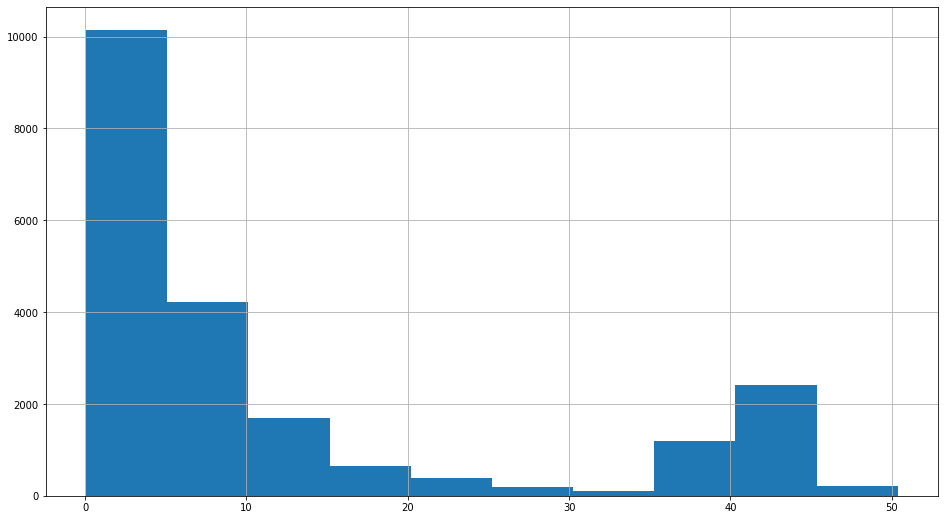

In [61]:
df["years_employed"].hist(figsize=(16,9))

На основании гистограммы выделим 3 категории для колонки years_employed.

In [62]:
def employed_categ(row):
    if row == 0:
        return "безработный/нет опыта"
    if row > 0 and row < 10:
        return "менее 10 лет"
    return "более или равно 10 лет"

In [63]:
df["years_employed_category"] = df["years_employed"].apply(employed_categ)

Изучим гистограмму переменной total income и проведем категоризацию по следующему принципу - доход ниже медианного и доход выше медианного

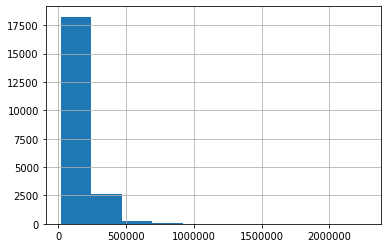

In [64]:
df["total_income"].hist()

In [65]:
df["total_income_category"] = pd.cut(df['total_income'],
                             [0,df["total_income"].quantile(0.25), df["total_income"].median(), df["total_income"].quantile(0.75), max(df["total_income"])], 
                                     labels = ["первый квартиль", "второй квартиль", "третий квартиль", "четвертый квартиль"])

In [66]:
df["total_income_category"].value_counts()

второй квартиль       5333
четвертый квартиль    5303
первый квартиль       5303
третий квартиль       5271
Name: total_income_category, dtype: int64

Удалим ненужные колонки из таблицы и проверим, не потеряли ли мы информацию в ходе обработки данных. Длина первоначального датасета - 21525. В первом этапе работы с дубликатами удалили 71 строку, во втором этапе - 244. Должно остаться 21210 строк.

In [67]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_category,years_employed,years_employed_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,один-два ребенка,23.115068,более или равно 10 лет,четвертый квартиль
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,один-два ребенка,11.024658,более или равно 10 лет,второй квартиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье,нет детей,15.405479,более или равно 10 лет,третий квартиль
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,многодетный,11.298630,более или равно 10 лет,четвертый квартиль
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,нет детей,38.841096,более или равно 10 лет,третий квартиль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,жилье,один-два ребенка,12.408219,более или равно 10 лет,четвертый квартиль
21521,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,автомобиль,нет детей,39.260274,более или равно 10 лет,третий квартиль
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,один-два ребенка,5.789041,менее 10 лет,первый квартиль
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,автомобиль,многодетный,8.526027,менее 10 лет,четвертый квартиль


In [68]:
family_dict = df[['family_status', 'family_status_id']]

In [69]:
education_dict = df[['education', 'education_id']]

In [70]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,children_category,years_employed,years_employed_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,один-два ребенка,23.115068,более или равно 10 лет,четвертый квартиль
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,один-два ребенка,11.024658,более или равно 10 лет,второй квартиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жилье,нет детей,15.405479,более или равно 10 лет,третий квартиль
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,многодетный,11.298630,более или равно 10 лет,четвертый квартиль
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,нет детей,38.841096,более или равно 10 лет,третий квартиль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,жилье,один-два ребенка,12.408219,более или равно 10 лет,четвертый квартиль
21521,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,автомобиль,нет детей,39.260274,более или равно 10 лет,третий квартиль
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,один-два ребенка,5.789041,менее 10 лет,первый квартиль
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,автомобиль,многодетный,8.526027,менее 10 лет,четвертый квартиль


In [71]:
len(df)

21210

Также у нас добавились новые колонки, которые имеют тип object, приведем их к типу category перед ответом на вопросы.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21210 entries, 0 to 21524
Data columns (total 16 columns):
children                   21210 non-null int64
days_employed              21210 non-null int64
dob_years                  21210 non-null int64
education                  21210 non-null category
education_id               21210 non-null int64
family_status              21210 non-null category
family_status_id           21210 non-null int64
gender                     21210 non-null category
income_type                21210 non-null category
debt                       21210 non-null category
total_income               21210 non-null int64
purpose                    21210 non-null object
children_category          21210 non-null object
years_employed             21210 non-null float64
years_employed_category    21210 non-null object
total_income_category      21210 non-null category
dtypes: category(6), float64(1), int64(6), object(3)
memory usage: 1.9+ MB


In [73]:
df = df.astype({"family_status":"category", "years_employed_category":"category", 
                "children_category":"category", "purpose":"category"})

In [74]:
family_dict = family_dict.drop_duplicates().reset_index(drop=True)

In [75]:
education_dict = education_dict.drop_duplicates().reset_index(drop=True)

In [76]:
family_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [77]:
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


### Шаг 3. Ответьте на вопросы<a id="id-questions"></a>

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [78]:
df_1 = df.groupby("debt")["children_category"].value_counts()

In [79]:
df_1

debt  children_category
0     нет детей            12830
      один-два ребенка      6292
      многодетный            348
1     нет детей             1062
      один-два ребенка       647
      многодетный             31
Name: children_category, dtype: int64

Поделим количество должников в каждой категории на количество людей в категории.

In [80]:
df_1[1] / (df_1[0] + df_1[1]) * 100

children_category
нет детей           7.644688
один-два ребенка    9.324110
многодетный         8.179420
Name: children_category, dtype: float64

### Вывод

По результатам итоговой таблицы можно сказать, что люди без детей реже становятся должниками, чем люди с 1-2 детьми, а также многодетные клиенты. Но, на мой взгляд, различие не такое сильное, чтобы можно было сделать однозначный вывод.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [81]:
df_2 = df.groupby("debt")["family_status"].value_counts()

In [82]:
df_2

debt  family_status        
0     женат / замужем          11218
      гражданский брак          3741
      Не женат / не замужем     2518
      в разводе                 1108
      вдовец / вдова             885
1     женат / замужем            930
      гражданский брак           388
      Не женат / не замужем      274
      в разводе                   85
      вдовец / вдова              63
Name: family_status, dtype: int64

In [83]:
df_2[1] / (df_2[0] + df_2[1]) * 100

family_status
женат / замужем          7.655581
гражданский брак         9.396948
Не женат / не замужем    9.813754
в разводе                7.124895
вдовец / вдова           6.645570
Name: family_status, dtype: float64

Люди в категориях "гражданский брак" и "Не женат / не замужем" имеют практически одинаковый процент должников. Также из жизненного опыта можно сказать, что эти 2 категории очень близки друг к другу. Объединим их для лучшей читабельности итоговой таблицы.

In [84]:
df["family_status"] = df["family_status"].str.replace("гражданский брак", "Не женат / не замужем")

In [85]:
df_2 = df.groupby("debt")["family_status"].value_counts()

In [86]:
df_2[1] / (df_2[0] + df_2[1]) * 100

family_status
женат / замужем          7.655581
Не женат / не замужем    9.565092
в разводе                7.124895
вдовец / вдова           6.645570
Name: family_status, dtype: float64

### Вывод

По результатам итоговой таблицы можно сказать, что холостые люди имеют худшую статистику по возврату кредитов. Для банка более надежно если человек состоит/состоял в каких-то отношениях.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [87]:
df_3 = df.groupby("debt")["total_income_category"].value_counts()

In [88]:
df_3

debt  total_income_category
0     четвертый квартиль       4926
      первый квартиль          4880
      второй квартиль          4847
      третий квартиль          4817
1     второй квартиль           486
      третий квартиль           454
      первый квартиль           423
      четвертый квартиль        377
Name: total_income_category, dtype: int64

In [89]:
df_3[1] / (df_3[0] + df_3[1]) * 100

total_income_category
второй квартиль       9.113070
первый квартиль       7.976617
третий квартиль       8.613166
четвертый квартиль    7.109183
Name: total_income_category, dtype: float64

### Вывод

Люди с доходом выше медианного лучше возвращают кредиты. Но различие не такое сильное, чтобы делать однозначный вывод.

- Как разные цели кредита влияют на его возврат в срок?

In [90]:
df_4 = df.groupby("debt")["purpose"].value_counts()

In [91]:
df_4

debt  purpose     
0     недвижимость    5786
      жилье           4100
      автомобиль      3870
      образование     3594
      свадьба         2120
1     недвижимость     474
      автомобиль       402
      образование      370
      жилье            308
      свадьба          186
Name: purpose, dtype: int64

In [92]:
df_4[1] / (df_4[0] + df_4[1]) * 100

purpose
автомобиль      9.410112
жилье           6.987296
недвижимость    7.571885
образование     9.334006
свадьба         8.065915
Name: purpose, dtype: float64

### Вывод

Самые ненадежные с точки зрения выдачи кредита цели - кредит на автомобиль и образование. Возможно, такое происходит потому что такие кредиты являются краткосрочными и проценты по ним выше. Самые надежные кредиты на жилье и недвижимость. Проценты по ним не такие высокие и выплаты растянуты во времени.

In [93]:
df.pivot_table(index = ["debt", "children_category"], values = "children", aggfunc='count')

children
debt children_category          
0    многодетный             348
     нет детей             12830
     один-два ребенка       6292
1    многодетный              31
     нет детей              1062
     один-два ребенка        647

### Шаг 4. Общий вывод<a id="id-conclusion"></a>

В данном проекте я провела исследование датасета кредитного отдела банка. Изучила данные, провела их очистку и заполнила пропуски, лемматизировала текстовый столбец, категоризировала ряд переменных для формирования более наглядных выводов на основе данных.

Результат исследования показал следующее:
Если вы холост, не имеете детей, с доходом выше медианы, берете кредит на недвижимость, добро пожаловать в наш банк за кредитом!:)